In [1]:
# Step 1: Load and Inspect the Data

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Data (1).csv")

# Check basic information
print(df.info())

# Check missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [2]:
# Step 2: Data Cleaning

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Convert categorical variables to the appropriate data type
df['Gender'] = df['Gender'].astype('category')
df['OS'] = df['OS'].astype('category')
# Repeat for other categorical variables
df['SearchEngine'] = df['SearchEngine'].astype('category')
df['Zone'] = df['Zone'].astype('category')
df['Type of Traffic'] = df['Type of Traffic'].astype('category')
df['CustomerType'] = df['CustomerType'].astype('category')
df['Cookies Setting'] = df['Cookies Setting'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Marital Status'] = df['Marital Status'].astype('category')
df['WeekendPurchase'] = df['WeekendPurchase'].astype('category')
df['Made_Purchase'] = df['Made_Purchase'].astype('bool')  # Assuming 'Made_Purchase' is a binary target variable (True/False)

# Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   HomePage                         14731 non-null  float64 
 1   HomePage_Duration                14731 non-null  float64 
 2   LandingPage                      14731 non-null  float64 
 3   LandingPage_Duration             14731 non-null  float64 
 4   ProductDescriptionPage           14731 non-null  float64 
 5   ProductDescriptionPage_Duration  14731 non-null  float64 
 6   GoogleMetric:Bounce Rates        14731 non-null  float64 
 7   GoogleMetric:Exit Rates          14731 non-null  float64 
 8   GoogleMetric:Page Values         14731 non-null  float64 
 9   SeasonalPurchase                 14731 non-null  float64 
 10  Month_SeasonalPurchase           14731 non-null  object  
 11  OS                               14731 non-null  category
 12  Sear

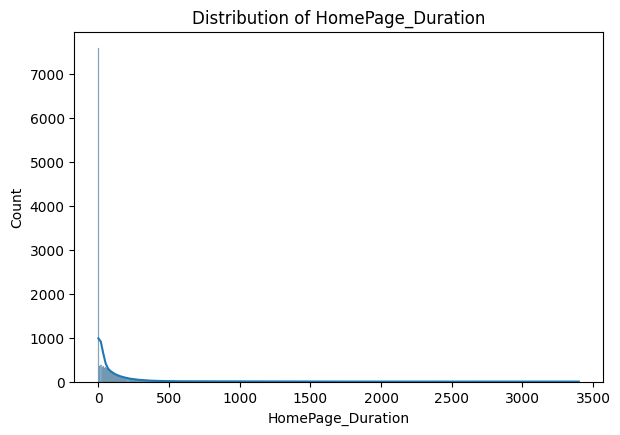

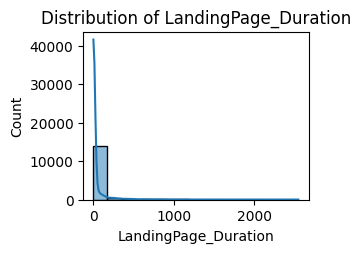

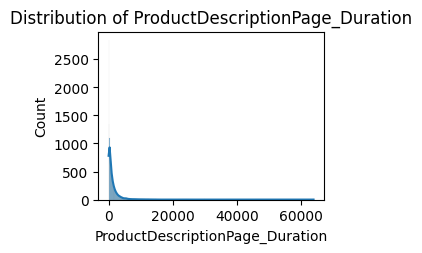

<ipython-input-3-6a38eccfb70b>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


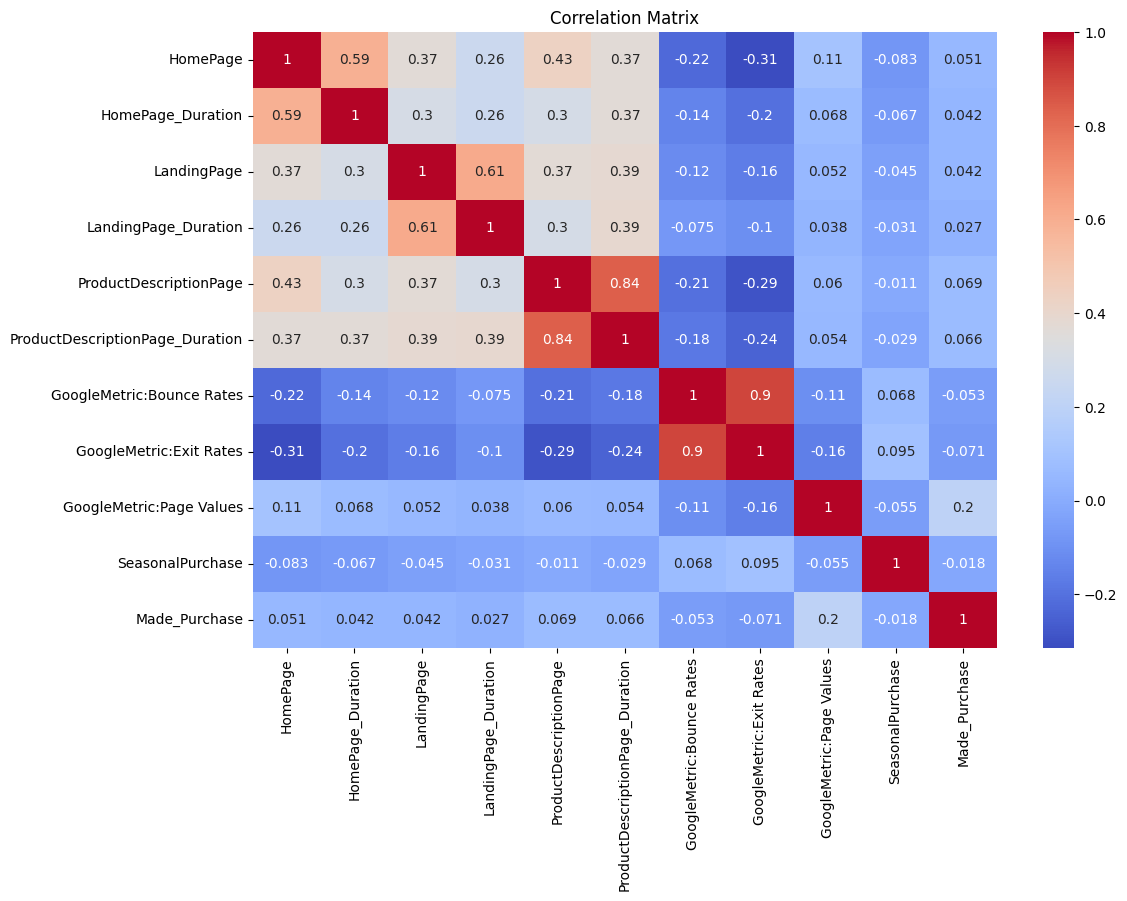

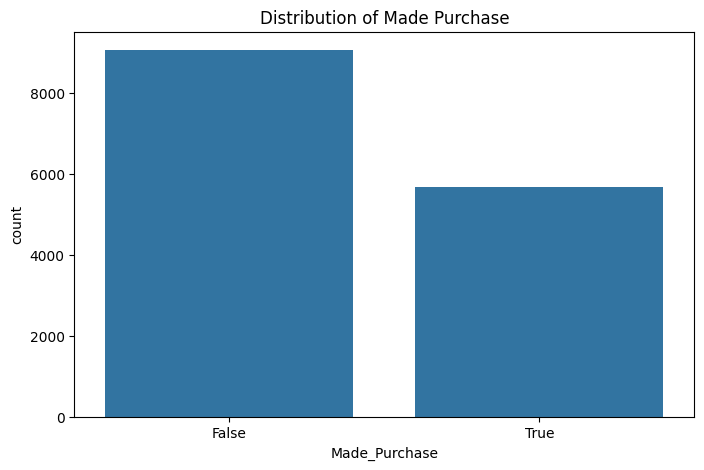

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# Explore the distribution of each feature
plt.figure(figsize=(15, 10))
for feature in ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration']:
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Analyze the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Investigate the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Made_Purchase')
plt.title('Distribution of Made Purchase')
plt.show()


In [4]:
# Check the column names in your DataFrame
print(df.columns)

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')


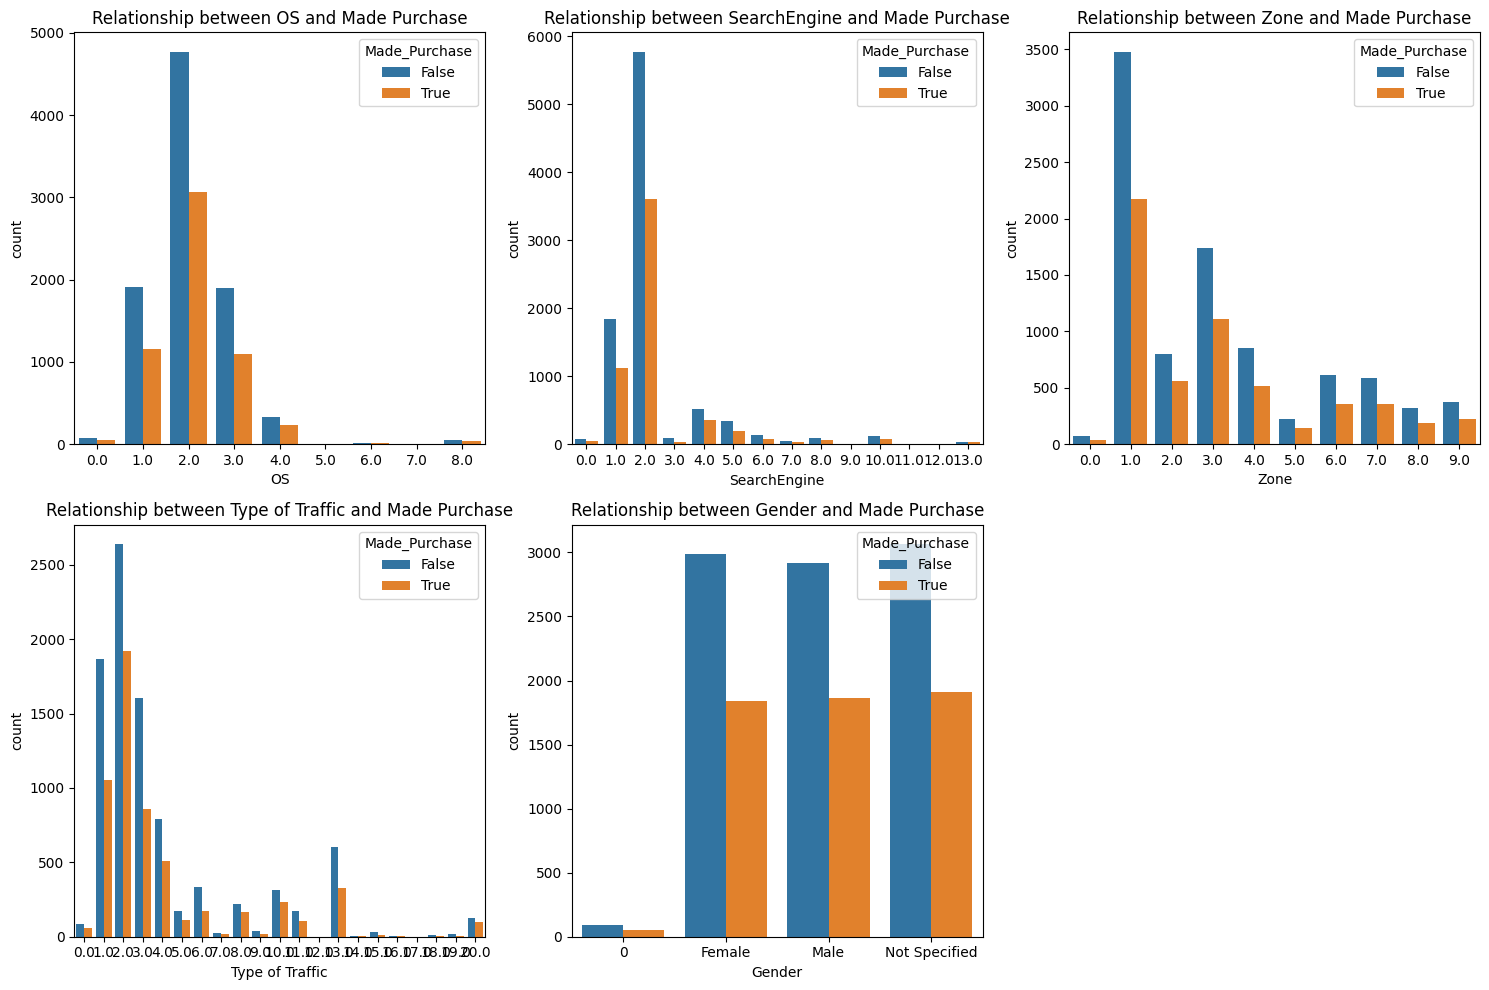

In [5]:
# Visualize the relationship between target and other features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'Gender'], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Made_Purchase')
    plt.title(f'Relationship between {feature} and Made Purchase')

plt.tight_layout()
plt.show()


In [6]:
# Step 5: Feature Engineering

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create a copy of the original DataFrame for safety
df_encoded = df.copy()

In [7]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
categorical_columns = ['Gender', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'CustomerType', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase']
for column in categorical_columns:
    # Convert the column to strings
    df_encoded[column] = df_encoded[column].astype(str)
    df_encoded[column] = le.fit_transform(df_encoded[column])


In [8]:
# One-hot encoding for categorical variables with more than two unique values
df_encoded = pd.get_dummies(df_encoded, columns=['SeasonalPurchase', 'Month_SeasonalPurchase'], drop_first=True)

# Split the data
X = df_encoded.drop('Made_Purchase', axis=1)
y = df_encoded['Made_Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical variables (if needed)
scaler = StandardScaler()
numerical_columns = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [64]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# Check the columns in the DataFrame
print(df.columns)

# Assuming 'Visitor' is one of the categorical columns
categorical_columns = ['Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Visitor', 'Gender', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase']

# Filter the categorical columns that are present in the DataFrame
categorical_columns_present = [col for col in categorical_columns if col in X_train.columns]

# Convert categorical features to one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns_present)


Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')


In [11]:
# Check the columns in X_train
print(X_train.columns)

# Assuming 'Visitor' is one of the categorical columns
categorical_columns = ['Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Visitor', 'Gender', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase']

# Filter the categorical columns that are present in X_train
categorical_columns_present = [col for col in categorical_columns if col in X_train.columns]

# Convert categorical features to one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns_present)


Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase',
       'SeasonalPurchase_0.2', 'SeasonalPurchase_0.4', 'SeasonalPurchase_0.6',
       'SeasonalPurchase_0.8', 'SeasonalPurchase_1.0',
       'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec',
       'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul',
       'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar',
       'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov',
       'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep'],
      dtype='object')


In [28]:
# Split the data
X = df.drop('Made_Purchase', axis=1)
y = df['Made_Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   HomePage                         14731 non-null  float64 
 1   HomePage_Duration                14731 non-null  float64 
 2   LandingPage                      14731 non-null  float64 
 3   LandingPage_Duration             14731 non-null  float64 
 4   ProductDescriptionPage           14731 non-null  float64 
 5   ProductDescriptionPage_Duration  14731 non-null  float64 
 6   GoogleMetric:Bounce Rates        14731 non-null  float64 
 7   GoogleMetric:Exit Rates          14731 non-null  float64 
 8   GoogleMetric:Page Values         14731 non-null  float64 
 9   SeasonalPurchase                 14731 non-null  float64 
 10  Month_SeasonalPurchase           14731 non-null  object  
 11  OS                               14731 non-null  category
 12  Sear

In [32]:
print(df.describe())

           HomePage  HomePage_Duration   LandingPage  LandingPage_Duration  \
count  14731.000000       14731.000000  14731.000000          14731.000000   
mean       2.226869          78.493274      0.485643             33.149341   
std        3.278867         178.636555      1.246848            139.538986   
min        0.000000           0.000000      0.000000              0.000000   
25%        0.000000           0.000000      0.000000              0.000000   
50%        1.000000           4.000000      0.000000              0.000000   
75%        3.000000          90.000000      0.000000              0.000000   
max       27.000000        3398.750000     24.000000           2549.375000   

       ProductDescriptionPage  ProductDescriptionPage_Duration  \
count            14731.000000                     14731.000000   
mean                31.295974                      1170.919582   
std                 44.801384                      2002.003129   
min                  0.000000    

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Split the data into training and testing sets
X = df.drop('Made_Purchase', axis=1)
y = df['Made_Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Handle missing values (if any)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)

# Step 3: Encode categorical variables using one-hot encoding
categorical_columns = ['Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status', 'WeekendPurchase']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)

# Align the columns with the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 4: Convert target variable to numerical
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Step 5: Optionally, scale numerical features if needed
scaler = StandardScaler()
numerical_columns = ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase']
X_train_encoded[numerical_columns] = scaler.fit_transform(X_train_encoded[numerical_columns])
X_test_encoded[numerical_columns] = scaler.transform(X_test_encoded[numerical_columns])


<ipython-input-33-3525e1e10d16>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.fillna(X_train.mean(), inplace=True)
<ipython-input-33-3525e1e10d16>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_test.fillna(X_train.mean(), inplace=True)


In [66]:
print(X_train.dtypes)


HomePage                            float64
HomePage_Duration                   float64
LandingPage                         float64
LandingPage_Duration                float64
ProductDescriptionPage              float64
ProductDescriptionPage_Duration     float64
GoogleMetric:Bounce Rates           float64
GoogleMetric:Exit Rates             float64
GoogleMetric:Page Values            float64
SeasonalPurchase                    float64
Month_SeasonalPurchase             category
OS                                 category
SearchEngine                       category
Zone                               category
Type of Traffic                    category
CustomerType                       category
Gender                             category
Cookies Setting                    category
Education                          category
Marital Status                     category
WeekendPurchase                    category
dtype: object


In [75]:
# Check if 'Month_SeasonalPurchase' is present in the original DataFrame
print("Original DataFrame columns:")
print(df.columns)


Original DataFrame columns:
Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')


In [76]:
# Assuming df is your original DataFrame
df_encoded = pd.get_dummies(df, columns=['Month_SeasonalPurchase'], drop_first=True)

# Split the data
X = df_encoded.drop('Made_Purchase', axis=1)
y = df_encoded['Made_Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rest of your code for scaling and modeling...


In [79]:
# Assuming 'CustomerType' is a categorical column
df_encoded = pd.get_dummies(df_encoded, columns=['CustomerType'], drop_first=True)


In [82]:
# Identify and one-hot encode all categorical columns
categorical_columns = X_train.select_dtypes(include=['category']).columns
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_encoded, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test_encoded)


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Make predictions with Random Forest
rf_pred = rf_model.predict(X_test_encoded)

# Train Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_encoded, y_train)

# Make predictions with SVM
svm_pred = svm_model.predict(X_test_encoded)

# Train k-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_encoded, y_train)

# Make predictions with KNN
knn_pred = knn_model.predict(X_test_encoded)

In [90]:
# Evaluate Decision Tree on Training Set
dt_train_pred = dt_model.predict(X_train_encoded)
print("Decision Tree (Training Set):")
print(f'Accuracy: {accuracy_score(y_train, dt_train_pred):.2f}')
print(classification_report(y_train, dt_train_pred))
print(confusion_matrix(y_train, dt_train_pred))
print("\n")

# Evaluate Random Forest on Training Set
rf_train_pred = rf_model.predict(X_train_encoded)
print("Random Forest (Training Set):")
print(f'Accuracy: {accuracy_score(y_train, rf_train_pred):.2f}')
print(classification_report(y_train, rf_train_pred))
print(confusion_matrix(y_train, rf_train_pred))
print("\n")

# Evaluate SVM on Training Set
svm_train_pred = svm_model.predict(X_train_encoded)
print("Support Vector Machine (Training Set):")
print(f'Accuracy: {accuracy_score(y_train, svm_train_pred):.2f}')
print(classification_report(y_train, svm_train_pred))
print(confusion_matrix(y_train, svm_train_pred))
print("\n")

# Evaluate KNN on Training Set
knn_train_pred = knn_model.predict(X_train_encoded)
print("k-Nearest Neighbors (Training Set):")
print(f'Accuracy: {accuracy_score(y_train, knn_train_pred):.2f}')
print(classification_report(y_train, knn_train_pred))
print(confusion_matrix(y_train, knn_train_pred))


Decision Tree (Training Set):
Accuracy: 0.84
              precision    recall  f1-score   support

       False       0.80      1.00      0.89      7180
        True       0.99      0.60      0.75      4604

    accuracy                           0.84     11784
   macro avg       0.89      0.80      0.82     11784
weighted avg       0.87      0.84      0.83     11784

[[7163   17]
 [1844 2760]]


Random Forest (Training Set):
Accuracy: 0.84
              precision    recall  f1-score   support

       False       0.84      0.91      0.88      7180
        True       0.85      0.73      0.78      4604

    accuracy                           0.84     11784
   macro avg       0.84      0.82      0.83     11784
weighted avg       0.84      0.84      0.84     11784

[[6564  616]
 [1245 3359]]


Support Vector Machine (Training Set):
Accuracy: 0.63
              precision    recall  f1-score   support

       False       0.63      0.98      0.77      7180
        True       0.76      0.09  

In [93]:
# Evaluate Decision Tree on Test Set
print("Decision Tree (Test Set):")
print(f'Accuracy: {accuracy_score(y_test, dt_test_pred):.2f}')
print(classification_report(y_test, dt_test_pred))
print(confusion_matrix(y_test, dt_test_pred))
print("\n")

# Evaluate Random Forest on Test Set
print("Random Forest (Test Set):")
print(f'Accuracy: {accuracy_score(y_test, rf_test_pred):.2f}')
print(classification_report(y_test, rf_test_pred))
print(confusion_matrix(y_test, rf_test_pred))
print("\n")

# Evaluate SVM on Test Set
print("Support Vector Machine (Test Set):")
print(f'Accuracy: {accuracy_score(y_test, svm_test_pred):.2f}')
print(classification_report(y_test, svm_test_pred))
print(confusion_matrix(y_test, svm_test_pred))
print("\n")

# Evaluate KNN on Test Set
print("k-Nearest Neighbors (Test Set):")
print(f'Accuracy: {accuracy_score(y_test, knn_test_pred):.2f}')
print(classification_report(y_test, knn_test_pred))
print(confusion_matrix(y_test, knn_test_pred))


Decision Tree (Test Set):
Accuracy: 0.48
              precision    recall  f1-score   support

       False       0.59      0.60      0.60      1885
        True       0.28      0.27      0.27      1062

    accuracy                           0.48      2947
   macro avg       0.43      0.44      0.43      2947
weighted avg       0.48      0.48      0.48      2947

[[1127  758]
 [ 773  289]]


Random Forest (Test Set):
Accuracy: 0.53
              precision    recall  f1-score   support

       False       0.62      0.66      0.64      1885
        True       0.32      0.28      0.30      1062

    accuracy                           0.53      2947
   macro avg       0.47      0.47      0.47      2947
weighted avg       0.51      0.53      0.52      2947

[[1253  632]
 [ 761  301]]


Support Vector Machine (Test Set):
Accuracy: 0.67
              precision    recall  f1-score   support

       False       0.66      0.98      0.79      1885
        True       0.76      0.10      0.18    

In [99]:
from sklearn.model_selection import RandomizedSearchCV

# Decision Tree hyperparameter tuning
dt_param_dist = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), dt_param_dist, n_iter=10, cv=5, random_state=42)
dt_random_search.fit(X_train_encoded, y_train)

best_dt_model = dt_random_search.best_estimator_
best_dt_test_pred = best_dt_model.predict(X_test_encoded)

# Random Forest hyperparameter tuning
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_dist, n_iter=10, cv=5, random_state=42)
rf_random_search.fit(X_train_encoded, y_train)

best_rf_model = rf_random_search.best_estimator_
best_rf_test_pred = best_rf_model.predict(X_test_encoded)

# Evaluate the best models
print("Best Decision Tree (Test Set):")
print(f'Accuracy: {accuracy_score(y_test, best_dt_test_pred):.2f}')
print(classification_report(y_test, best_dt_test_pred))
print(confusion_matrix(y_test, best_dt_test_pred))
print("\n")

print("Best Random Forest (Test Set):")
print(f'Accuracy: {accuracy_score(y_test, best_rf_test_pred):.2f}')
print(classification_report(y_test, best_rf_test_pred))
print(confusion_matrix(y_test, best_rf_test_pred))
print("\n")


Best Decision Tree (Test Set):
Accuracy: 0.66
              precision    recall  f1-score   support

       False       0.68      0.90      0.77      1885
        True       0.57      0.24      0.33      1062

    accuracy                           0.66      2947
   macro avg       0.62      0.57      0.55      2947
weighted avg       0.64      0.66      0.61      2947

[[1698  187]
 [ 811  251]]


Best Random Forest (Test Set):
Accuracy: 0.68
              precision    recall  f1-score   support

       False       0.69      0.93      0.79      1885
        True       0.66      0.25      0.37      1062

    accuracy                           0.68      2947
   macro avg       0.68      0.59      0.58      2947
weighted avg       0.68      0.68      0.64      2947

[[1749  136]
 [ 793  269]]


